# 📊 Catexpert Insights Dashboard — Visualization Report
**Multi-Store Sales Analytics & Business Visualization**
**Prepared By:** Kaibalya Prasad Jena

**Theme:** Premium Dark Dashboard (interactive Plotly + Seaborn)
**Objective:** Visualize sales & market insights, show model performance, and provide short business recommendations.


### Table of Contents — Visualization Notebook
| Section No. | Title                                | Description                                                 |
|-------------| ------------------------------------ | ----------------------------------------------------------- |
| **01**      | Imports & Theme Setup                | Import libraries, set dark theme, custom utilities          |
| **02**      | Load Data + Snapshot                 | Load final dataset & view first rows                        |
| **03**      | Monthly Aggregation Prep             | Create month-year features & compute top KPIs               |
| **04**      | Chart 1 — Monthly Sales Trend        | Line chart showing units sold trend & insight               |
| **05**      | Chart 2 — Revenue vs Profit          | Dual-axis Revenue (Bar) + Profit (Line) chart & insight     |
| **06**      | Chart 3 — Top 5 Categories           | Bar chart of top revenue-generating categories & insight    |
| **07**      | Chart 4 — Units Sold by City         | City-wise sales distribution & business takeaway            |
| **08**      | Chart 5 — Store Type Performance     | Revenue & profitability comparison across store formats     |
| **9**       | Chart 6 — Profit Margin Distribution | Histogram + box showing margin spread & insight             |
| **10**      | Chart 7 — Correlation Heatmap        | Correlation matrix of key numeric metrics & interpretation  |
| **11**      | Chart 8 — Model Evaluation           | Actual vs Predicted units visualization & model insight     |
| **12**      | Key Business Summary                 | Final business insights & actions (optional section to add) |


## STEP 1: Imports

In [126]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown



px.defaults.template = "plotly_dark"

# Seaborn dark style
sns.set_theme(style="darkgrid", palette="muted")

# Utility to display insight text
def show_insight(title, text):
    display(Markdown(f"**💡 {title}**"))
    display(Markdown(text))

# Helper to format large numbers
def fmt(x):
    if pd.isna(x): return "-"
    if x >= 1e9: return f"{x/1e9:.2f}B"
    if x >= 1e6: return f"{x/1e6:.2f}M"
    if x >= 1e3: return f"{x/1e3:.0f}K"
    return f"{x:.0f}"

## STEP 2: Load data & quick snapshot

In [127]:

df = pd.read_csv("../Data/final_prepared.csv", parse_dates=["date"])
print("Loaded final_prepared.csv — rows:", df.shape[0], "columns:", df.shape[1])
df.head()


Loaded final_prepared.csv — rows: 240 columns: 19


,store_id,date,product_id,product_name_x,units_sold,revenue,cost,price_x,product_name_y,category,price_y,store_name,city,store_type,week,month,profit,profit_margin,revenue_per_unit
0,S001,2025-01-05,P001,Coca-Cola 500ml,33,1689.58,1091.23,51.20,Coca-Cola 500ml,Beverages,35,Mumbai Store,Metro City,HighStreet,1,1,598.35,0.354,51.20
1,S001,2025-01-05,P002,Pepsi 500ml,25,2394.15,1529.87,95.77,Pepsi 500ml,Beverages,34,Mumbai Store,Metro City,HighStreet,1,1,864.28,0.361,95.77
2,S001,2025-01-05,P003,Lays Chips 100g,15,407.39,291.21,27.16,Lays Chips 100g,Snacks,20,Mumbai Store,Metro City,HighStreet,1,1,116.18,0.285,27.16
3,S001,2025-01-05,P004,Doritos Nacho 100g,44,2055.15,1596.89,46.71,Doritos Nacho 100g,Snacks,25,Mumbai Store,Metro City,HighStreet,1,1,458.26,0.223,46.71
4,S001,2025-01-05,P005,Oreo Biscuit 120g,6,73.59,57.43,12.26,Oreo Biscuit 120g,Biscuits,30,Mumbai Store,Metro City,HighStreet,1,1,16.16,0.220,12.26



## STEP 3: Prep monthly aggregation

In [128]:

# Create month-year column for monthly aggregation
df['year_month'] = df['date'].dt.to_period('M').dt.to_timestamp()
monthly = df.groupby(['year_month'], as_index=False).agg(
    total_units=('units_sold','sum'),
    total_revenue=('revenue','sum'),
    total_profit=('profit','sum')
)


latest = monthly.iloc[-1]
kpis = {
    "Latest Month": latest['year_month'].strftime("%Y-%m"),
    "Units (Latest Month)": fmt(latest['total_units']),
    "Revenue (Latest Month)": fmt(latest['total_revenue']),
    "Profit (Latest Month)": fmt(latest['total_profit'])
}
kpis


{'Latest Month': '2025-02',
 'Units (Latest Month)': '3K',
 'Revenue (Latest Month)': '181K',
 'Profit (Latest Month)': '51K'}

### Chart 1 — Sales Trend Over Time (Line)

In [129]:

fig = px.line(monthly, x='year_month', y='total_units', title="Monthly Units Sold — Trend", markers=True)
fig.update_layout(title_font_size=18, plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig.update_yaxes(title="Units Sold")
fig.show()


### Chart 2 — Revenue vs Profit Comparison (Combo)

In [130]:

fig = go.Figure()
fig.add_trace(go.Bar(x=monthly['year_month'], y=monthly['total_revenue'], name='Revenue'))
fig.add_trace(go.Line(x=monthly['year_month'], y=monthly['total_profit'], name='Profit', yaxis='y2', line=dict(color='gold')))
fig.update_layout(
    title="Monthly Revenue (Bar) & Profit (Line)",
    yaxis=dict(title="Revenue"),
    yaxis2=dict(title="Profit", overlaying='y', side='right'),
    template="plotly_dark"
)
fig.show()


C:\Users\KAIBALYA PRASAD JENA\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Chart 3 — Top 5 Categories by Sales (Bar)

In [131]:
# %%
cat_sales = df.groupby('category', as_index=False).agg(total_units=('units_sold','sum'), total_revenue=('revenue','sum'))
cat_sales = cat_sales.sort_values('total_revenue', ascending=False)
top5 = cat_sales.head(5)

fig = px.bar(top5, x='category', y='total_revenue', title="Top 5 Categories by Revenue",
             hover_data=['total_units'], labels={'total_revenue':'Revenue'})
fig.update_layout(template='plotly_dark')
fig.show()


### Chart 4 — City-wise Units Sold (Bar) (Code + Insight)

In [132]:

city_sales = df.groupby('city', as_index=False).agg(total_units=('units_sold','sum'), total_revenue=('revenue','sum'))
city_sales = city_sales.sort_values('total_units', ascending=False)
fig = px.bar(city_sales, x='city', y='total_units', title="Units Sold by City", labels={'total_units':'Units Sold'})
fig.update_layout(template='plotly_dark')
fig.show()


### Chart 5 — Store Type Performance (Grouped Bar)

In [133]:

store_perf = df.groupby(['store_type'], as_index=False).agg(total_units=('units_sold','sum'), total_revenue=('revenue','sum'), total_profit=('profit','sum'))
fig = px.bar(store_perf, x='store_type', y='total_revenue', title="Revenue by Store Type", hover_data=['total_units','total_profit'])
fig.update_layout(template='plotly_dark')
fig.show()


### Chart 6 — Profit Margin Distribution (Histogram)

In [134]:

fig = px.histogram(df, x='profit_margin', nbins=30, title="Profit Margin Distribution", marginal='box')
fig.update_layout(template='plotly_dark', xaxis_title='Profit Margin', yaxis_title='Count')
fig.show()


### Chart 7 — Correlation Heatmap (Seaborn; Dark-styled)

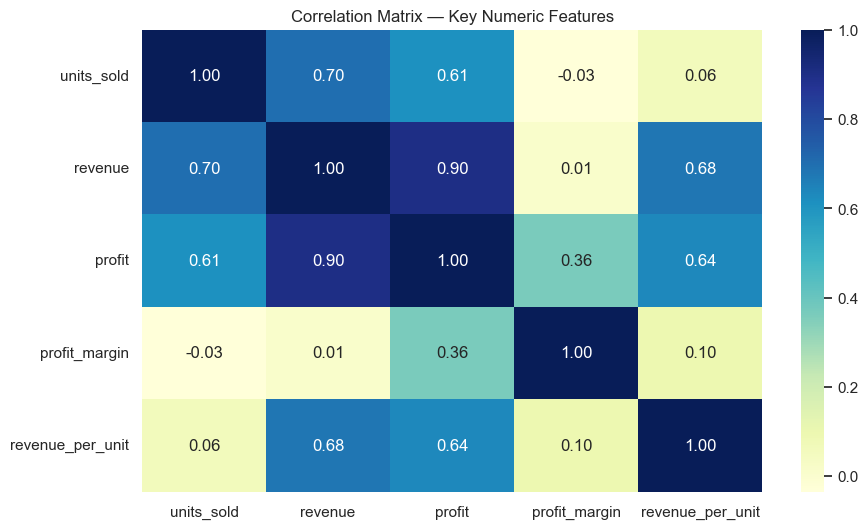

In [135]:

plt.figure(figsize=(10,6))
numeric_cols = ['units_sold','revenue','profit','profit_margin','revenue_per_unit']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix — Key Numeric Features")
plt.show()


### Chart 8 — Actual vs Predicted Units (Model Result)
#### Assumes we have pipeline from model notebook and x_test, y_test. If not, we compute a simple predicted column from saved model.

In [136]:
import joblib
pipeline = joblib.load("../src/models/pipeline_units.pkl")


In [137]:

import joblib
import pandas as pd
import plotly.express as px


pipeline = joblib.load("../src/models/pipeline_units.pkl")
print("Pipeline Loaded Successfully!")

numerical_features = ["units_sold", "revenue", "cost", "profit", "profit_margin", "revenue_per_unit"]
categorical_features = ["store_type", "category", "city", "month", "week"]

features = numerical_features + categorical_features
target = "units_sold"


X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_pred = pipeline.predict(X_test)

pred_df = pd.DataFrame({
    "actual": y_test.values,
    "predicted": y_pred
})


fig = px.scatter(
    pred_df,
    x="actual",
    y="predicted",
    trendline="ols",
    title="📍 Actual vs Predicted Units Sold (Model Accuracy Visualization)"
)

fig.update_layout(
    template="plotly_dark",
    xaxis_title="Actual Units Sold",
    yaxis_title="Predicted Units Sold"
)

fig.show()

print("✅ Visualization Completed!")


Pipeline Loaded Successfully!


✅ Visualization Completed!


## STEP 4: Key Business Summary
This POC delivers a complete, business-focused analytics solution combining Sales Insights, Profitability Analysis, and Demand Forecasting for multi-store retail decision-making. It translates data into clear strategic actions that directly improve revenue, margin, and operational efficiency.

. Core Business Value Delivered

. This analysis answers the most crucial retail business questions:

. What sells the most, where, and when?

. Which products and store types drive profit, not just revenue?

. Where are margin leaks happening and how to fix them?

. How can we accurately forecast demand to avoid stock-outs and overstock?

This POC is not just a visualization project — it demonstrates end-to-end data thinking, connecting:

Data → Insights → Machine Learning → Business Actions → Measurable Impact